In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV

Data Loading and Initial Exploration
Loads training and testing data from CSV files.
Displays the first few rows and the shape of the training data.
Provides information about the data types and missing values in the training set.

In [ ]:
data_train = pd.read_csv('/content/training_data.csv')
data_test = pd.read_csv('/content/testing_data.csv')
gc.collect()

16

In [ ]:
data_train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [ ]:
data_test.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No


In [ ]:
data_train.shape

(105000, 26)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

Missing Values Treatment:

Data Cleaning
Handles missing values by first dropping rows with nulls and then attempting to impute missing values in a column named 'column_with_nulls'. However, this column doesn't exist in your dataset.

In [ ]:
data_train.isnull().sum()

,0
ID,0
Date_Of_Disbursement,235
Business,15
Jobs_Reatained,0
Jobs_Created,0
Year_Of_Commitment,0
Guaranteed_Approved _Loan,0
Borrower_Name,3
Low_Documentation_Loan,367
Demography,0


This line of code removes any rows in the Pandas DataFrame data_train that contain missing values (NaN).

In [ ]:
data_train.dropna(inplace=True)

In [ ]:
data_train.isnull().sum()

,0
ID,0
Date_Of_Disbursement,0
Business,0
Jobs_Reatained,0
Jobs_Created,0
Year_Of_Commitment,0
Guaranteed_Approved _Loan,0
Borrower_Name,0
Low_Documentation_Loan,0
Demography,0


Imputing Data:

Imputing data to deal with the missing values.

In [ ]:
if 'column_with_nulls' in data_train.columns:
    data_train['column_with_nulls'] = data_train['column_with_nulls'].fillna(data_train['column_with_nulls'].mean())
else:
    print("Column 'column_with_nulls' not found in the DataFrame.")

Column 'column_with_nulls' not found in the DataFrame.


Use as target variable:

In [ ]:
print(data_train.columns)

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')


Exploratory Data Analysis:

Let's evaluate the data with describe function to gain the mean, std, min and max values.

In [ ]:
data_train.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,103894.000000,103894.000000,103894.000000,103894.000000,103894.000000,103894.000000,1.038940e+05,103894.000000,103894.000000
mean,52514.169192,12.784136,10.462731,9.908156,406231.541311,156.553227,4.651749e+09,2704.827189,0.277494
std,30306.037949,271.976472,271.773392,58.365218,260294.561487,116.563135,2.547706e+09,12655.470977,0.447765
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000034e+09,0.000000,0.000000
25%,26275.250000,0.000000,0.000000,2.000000,236115.000000,90.000000,2.465519e+09,0.000000,0.000000
50%,52525.500000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.105144e+09,1.000000,0.000000
75%,78753.750000,4.000000,1.000000,9.000000,561790.000000,180.000000,6.738794e+09,1.000000,1.000000
max,104999.000000,8800.000000,8800.000000,7200.000000,928120.000000,692.000000,9.996003e+09,92006.000000,1.000000


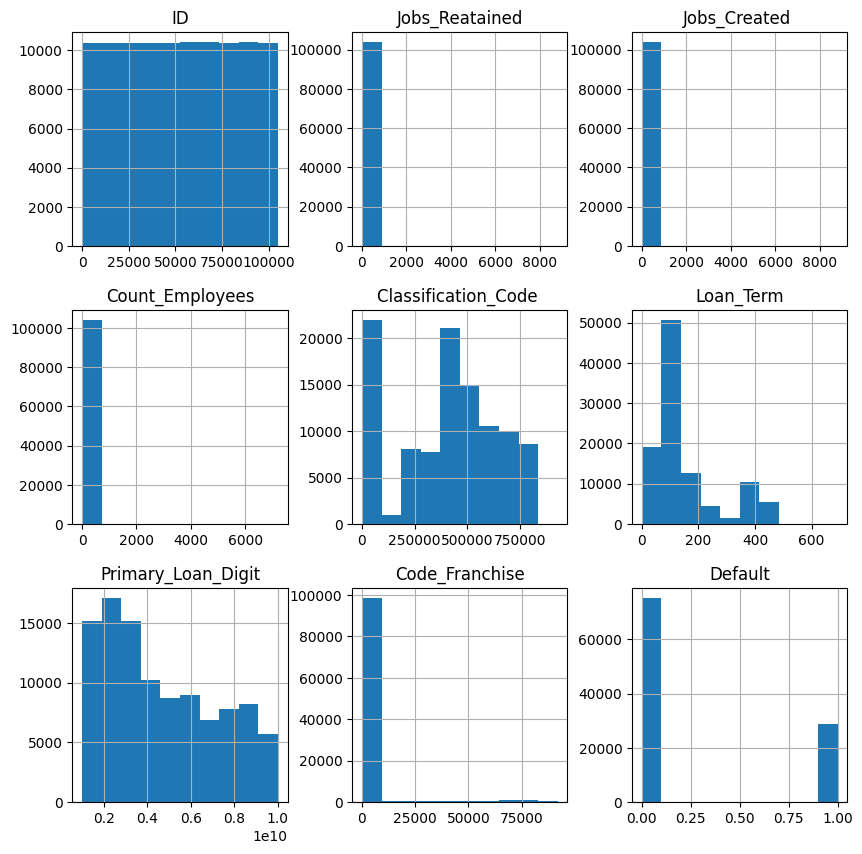

In [ ]:
data_train.hist(figsize=(10,10))
plt.show()

Outlier Treatment:

Through boxplot we got to know that some values of the dataset consists of outliers.

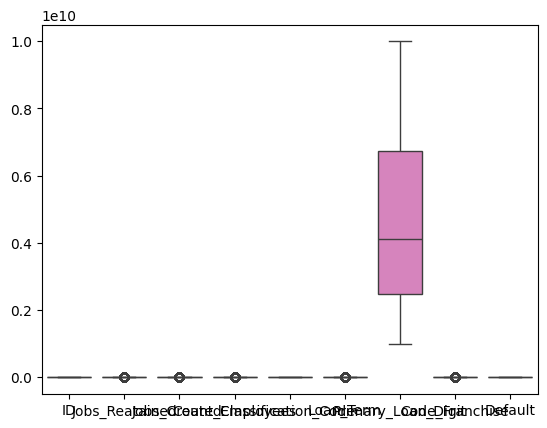

In [ ]:
sns.boxplot(data=data_train)
plt.show()

In [ ]:
for col in data_train.columns:
    if data_train[col].dtype == 'object': # Check if the column is of object type
        try:
            data_train[col] = pd.to_numeric(data_train[col], errors='raise')
        except ValueError:
            print(f"Could not convert column {col} to numeric. Trying to extract numeric values.")
            try:
                data_train[col] = data_train[col].str.extract(r'(\d+)').astype(float)
            except:
                print(f"Could not extract numeric values from column {col}. Skipping this column.")

Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_train_no_outliers = data_train[~((data_train < lower_bound) | (data_train > upper_bound)).any(axis=1)]

Could not convert column Date_Of_Disbursement to numeric. Trying to extract numeric values.
Could not convert column Business to numeric. Trying to extract numeric values.
Could not convert column Year_Of_Commitment  to numeric. Trying to extract numeric values.
Could not convert column Guaranteed_Approved _Loan to numeric. Trying to extract numeric values.
Could not convert column Borrower_Name  to numeric. Trying to extract numeric values.
Could not convert column Low_Documentation_Loan to numeric. Trying to extract numeric values.
Could not convert column Demography to numeric. Trying to extract numeric values.
Could not convert column State_Of_Bank to numeric. Trying to extract numeric values.
Could not convert column ChargedOff_Amount  to numeric. Trying to extract numeric values.
Could not convert column Borrower_City to numeric. Trying to extract numeric values.
Could not convert column Borrower_State to numeric. Trying to extract numeric values.
Could not convert column Gross_A

Correlation Matrix:

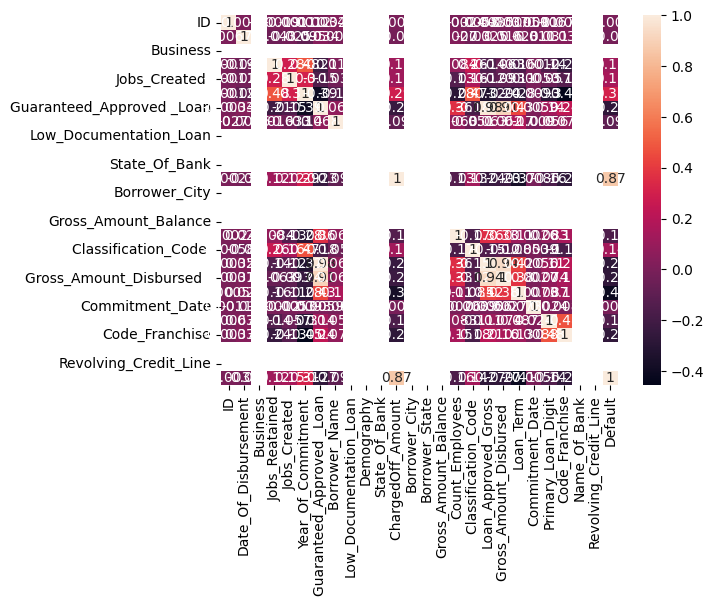

In [ ]:
corr_matrix = data_train_no_outliers.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

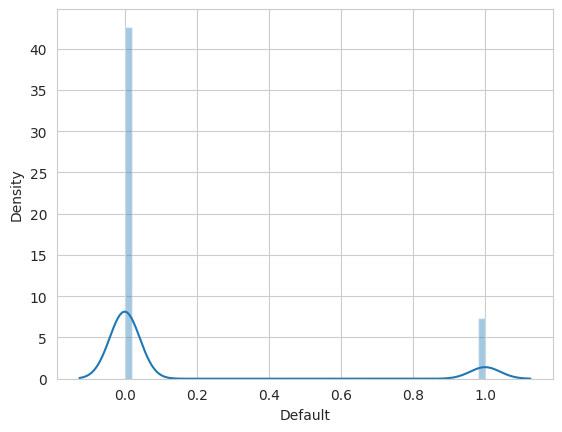

In [ ]:
sns.set_style('whitegrid')
sns.distplot(data_train_no_outliers['Default'])
plt.show()

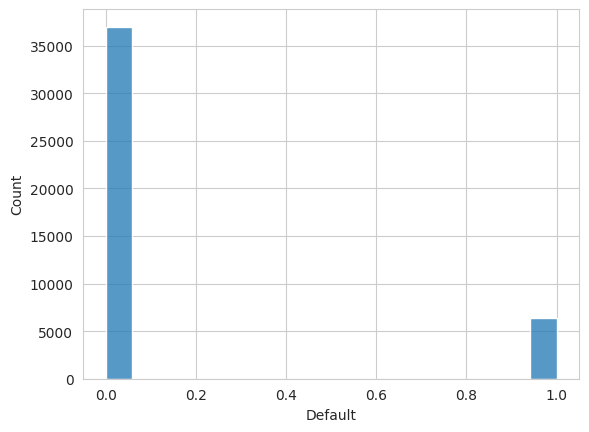

In [ ]:
sns.histplot(data_train_no_outliers[col])
plt.show()

In [ ]:
defaulters = data_train_no_outliers[data_train['Default'] == 1]
non_defaulters = data_train_no_outliers[data_train['Default'] == 0]

In [ ]:
data_train_no_outliers.Default.value_counts(normalize=True)*100

,proportion
Default,
0,85.321249
1,14.678751


In [ ]:
data_train_no_outliers.Default.value_counts(normalize=True)

,proportion
Default,
0,0.853212
1,0.146788


In [ ]:
len(defaulters)/len(non_defaulters)*100

17.20409762953753

<Axes: ylabel='count'>

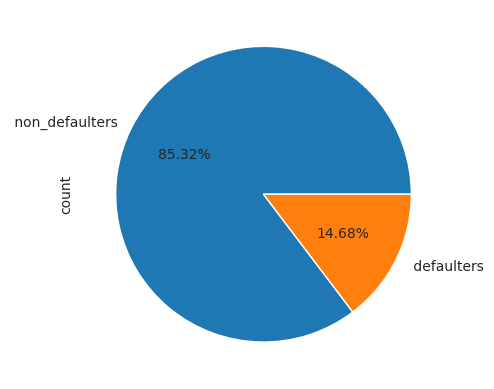

In [ ]:
labels = ' non_defaulters', ' defaulters'
data_train_no_outliers.Default.value_counts().plot.pie(autopct='%1.2f%%',labels=labels)

The dataset consists of 14.68% of defaulters and 85.32% of non-defulters. The amount of defaulters is less than non-defaulters in the dataset.

Percentage of defaulters in the Revolving_Credit_Line.

In [ ]:
len(data_train_no_outliers[(data_train_no_outliers.Revolving_Credit_Line != 0) & (data_train_no_outliers.Default==1)])/len(data_train_no_outliers[data_train_no_outliers.Revolving_Credit_Line != 0])*100

15.332202964079379

In [ ]:
def analysis(feature):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    (defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['blue', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Defaulters")

    plt.subplot(2,2,2)
    (non_defaulters[feature].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("Non_Defaulters")

    plt.subplot(2,2,3)
    (data_train_no_outliers[feature].value_counts(normalize=True)*100).plot.bar(color=['yellow', 'cyan'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("distribution of customers")

    plt.subplot(2,2,4)

    per_def= data_train_no_outliers[[feature , 'Business']].groupby([feature],as_index=False).mean()
    per_def["Business"] = per_def["Business"]*100
    per_def.sort_values(by='Business', ascending=False, inplace=True)

    s = plt.bar(feature, 'Business',data=per_def,color=['purple', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(feature)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)


    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=1.2,
                        top=1,
                        wspace=0.3,
                        hspace=0.6)
    plt.show()

The analyse the distribution of defaulters and non-defaulters in the Job_Reatained section.

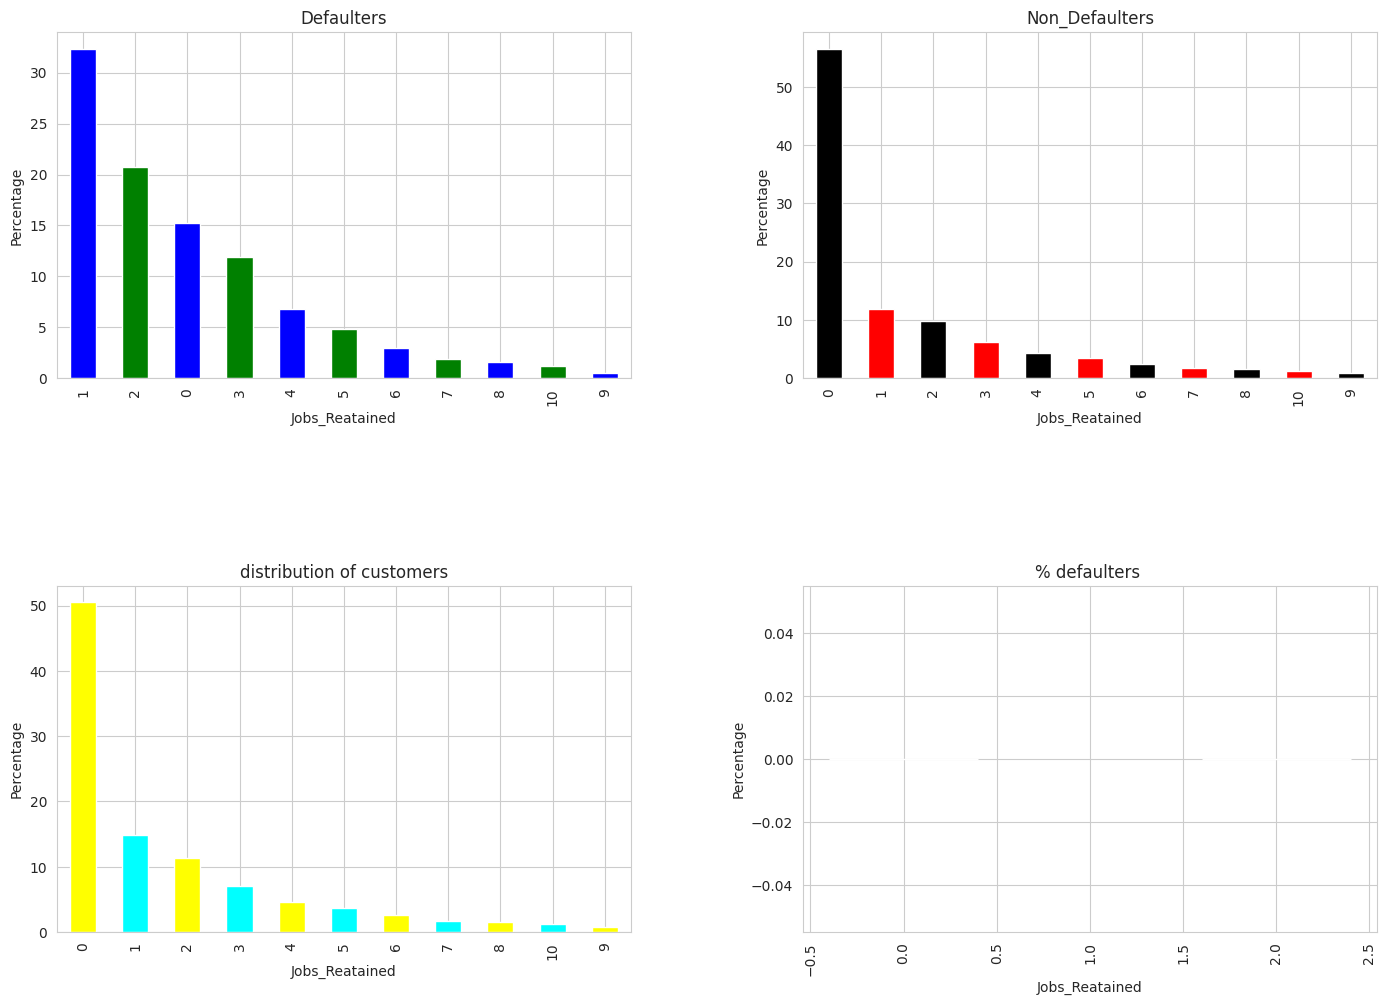

In [ ]:
analysis('Jobs_Reatained')

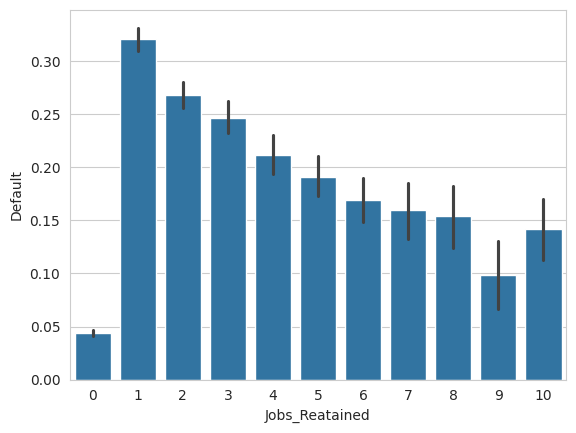

In [ ]:
sns.barplot(x='Jobs_Reatained', y='Default', data=data_train_no_outliers) #Verify that "Jobs_Retained" is the correct column name
plt.show()

This type of bar plot shows the relationship between a categorical variable and a numerical variable. In this case, it is likely showing the average default rate for each category of "Jobs_Retained". It helps to visualize the difference in default rates between different categories.

Multivariate Analysis:

In [ ]:
d = defaulters[col]

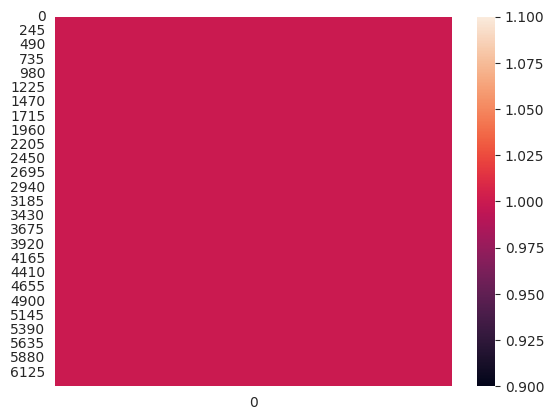

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the Series d to a 2D array using NumPy
d_array = np.asarray(d).reshape(len(d), 1)

# Generate the heatmap using the 2D array
sns.heatmap(d_array)

# Display the plot
plt.show()

Model Building:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Separate features and target variable before outlier removal
X = data_train.drop('Default', axis=1)
y = data_train['Default']

# Remove outliers from features only
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_no_outliers = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]

# Remove corresponding rows from target variable
y_no_outliers = y[X_no_outliers.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9852415542488182
Precision: 0.9536961819658814
Recall: 0.9429718875502008
F1 score: 0.9483037156704361
ROC AUC: 0.9676491101725156
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7428
           1       0.95      0.94      0.95      1245

    accuracy                           0.99      8673
   macro avg       0.97      0.97      0.97      8673
weighted avg       0.99      0.99      0.99      8673



Artificial Neural network:

In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu')) # Change input_dim to 20
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

1. Predict on the test data:

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


2. Evaluate the model:

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1087 6341]
 [ 851  394]]
Accuracy: 0.17075982935547102


Hyperparameter Tunning:

In [ ]:
!pip install scikeras

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def model_builder(hp):
  model = Sequential()
  model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   activation='relu', input_dim=20))
  model.add(Dense(1, activation='sigmoid'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 53s]
val_accuracy: 0.9762865702311198

Best val_accuracy So Far: 0.9913524786631266
Total elapsed time: 00h 05m 15s


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9713 - loss: 0.0825 - val_accuracy: 0.9897 - val_loss: 0.0740
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9909 - loss: 0.0403 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0417 - val_accuracy: 0.9907 - val_loss: 0.0387
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9928 - loss: 0.0334 - val_accuracy: 0.9914 - val_loss: 0.0394
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9911 - loss: 0.0384 - val_accuracy: 0.9914 - val_loss: 0.0401
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9922 - loss: 0.0362 - val_accuracy: 0.9914 - val_loss: 0.0376
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0345 - val_accuracy: 0.9912 - val_loss: 0.0384
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9925 - loss: 0.0337 - 

In [ ]:
eval_result = best_model.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9910 - loss: 0.0396
[test loss, test accuracy]: [0.03933119401335716, 0.9913524985313416]


In [ ]:
# Import tensorflow
import tensorflow as tf

# Define the nn_model function
def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    model = tf.keras.models.Sequential()

    for i, units in enumerate(hidden_units):
        model.add(tf.keras.layers.Dense(units=units, activation='relu', input_shape=(num_columns,)))
        model.add(tf.keras.layers.Dropout(rate=dropout_rates[i]))

    model.add(tf.keras.layers.Dense(units=num_labels, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9613 - loss: 0.1193 - val_accuracy: 0.9904 - val_loss: 0.0448
Epoch 2/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9909 - loss: 0.0416 - val_accuracy: 0.9909 - val_loss: 0.0404
Epoch 3/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0389 - val_accuracy: 0.9893 - val_loss: 0.0427
Epoch 4/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9914 - loss: 0.0377 - val_accuracy: 0.9902 - val_loss: 0.0422
Epoch 5/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9919 - loss: 0.0345 - val_accuracy: 0.9901 - val_loss: 0.0395
Epoch 6/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.0352 - val_accuracy: 0.9902 - val_loss: 0.0395
Epoch 7/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9923 - loss: 0.0343 - val_accuracy: 0.9909 - val_loss: 0.0394
Epoch 8/20
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9925 - loss: 0.0328 

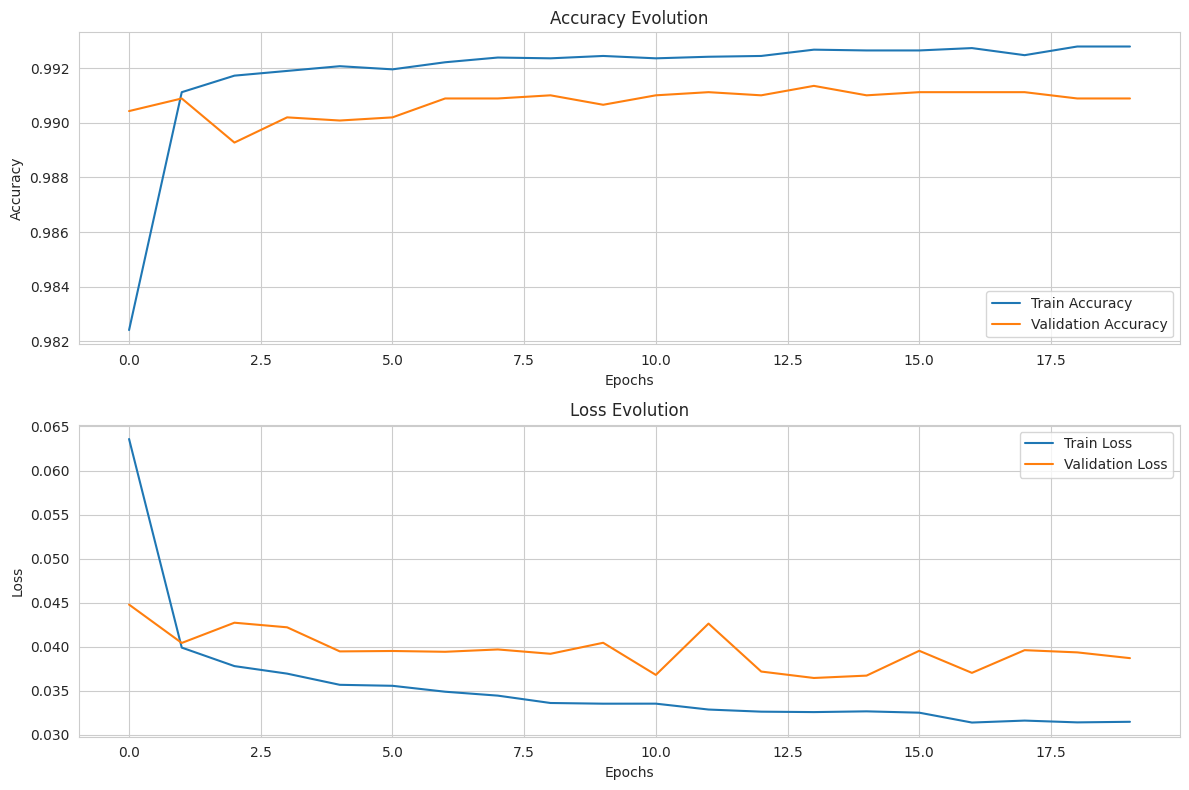

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_evolution(r):
    """
    Plots the training and validation accuracy and loss curves.

    Args:
      r: A Keras History object containing the training history.
    """

    plt.figure(figsize=(12, 8))

    # Accuracy plot
    plt.subplot(2, 1, 1)
    plt.plot(r.history['accuracy'], label='Train Accuracy')
    plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(2, 1, 2)
    plt.plot(r.history['loss'], label='Train Loss')
    plt.plot(r.history['val_loss'], label='Validation Loss')
    plt.title('Loss Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_learning_evolution(r)

From this graph we can observe that 1 is the value for the plot_learning_evolution. Both for the accuracy evolution and loss evolution the plots are slightly parallel to each other.  

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_nn(y_true, y_pred, train=True):
    """
    Evaluates the performance of a neural network model.

    Args:
      y_true: True labels.
      y_pred: Predicted labels.
      train: A boolean indicating whether the evaluation is for training or testing data.
    """

    if train:
        print("Train Classification Report:")
    else:
        print("Test Classification Report:")
    print(classification_report(y_true, y_pred))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{'Train' if train else 'Test'} Accuracy: {accuracy:.4f}")

y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29569
           1       0.96      0.99      0.98      5120

    accuracy                           0.99     34689
   macro avg       0.98      0.99      0.99     34689
weighted avg       0.99      0.99      0.99     34689

Confusion Matrix:
[[29364   205]
 [   38  5082]]
Train Accuracy: 0.9930


In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7428
           1       0.95      0.99      0.97      1245

    accuracy                           0.99      8673
   macro avg       0.97      0.99      0.98      8673
weighted avg       0.99      0.99      0.99      8673

Confusion Matrix:
[[7361   67]
 [  12 1233]]
Test Accuracy: 0.9909


In [ ]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

1085/1085 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


XGBoost Classifier:

In [ ]:
!pip install xgboost
# Install the xgboost library

from xgboost import XGBClassifier
# Import the XGBClassifier class from the xgboost library

xgb_clf = XGBClassifier(use_label_encoder=False)

In [ ]:
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Define the print_score function
def print_score(y_true, y_pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_true, y_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_true, y_pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_true, y_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_true, y_pred)}\n")

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      1.000000     0.997856  0.999683      0.998928      0.999684
recall         0.999628     1.000000  0.999683      0.999814      0.999683
f1-score       0.999814     0.998927  0.999683      0.999370      0.999683
support    29569.000000  5120.000000  0.999683  34689.000000  34689.000000
_______________________________________________
Confusion Matrix: 
 [[29558    11]
 [    0  5120]]

Test Result:
Accuracy Score: 99.08%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.998372     0.947733  0.990776     0.973052      0.991103
recall        0.990845     0.990361  0.990776     0.990603      0.990776
f1-score      0.994595     0.968578  0.990776     0.981586      0.990860
support    7428.00

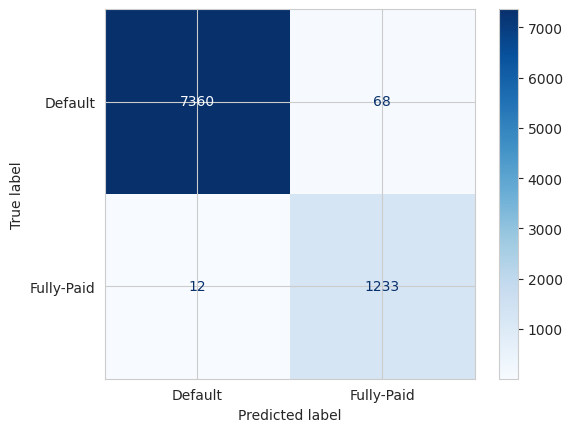

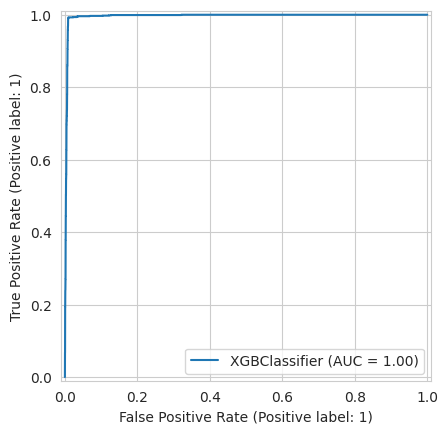

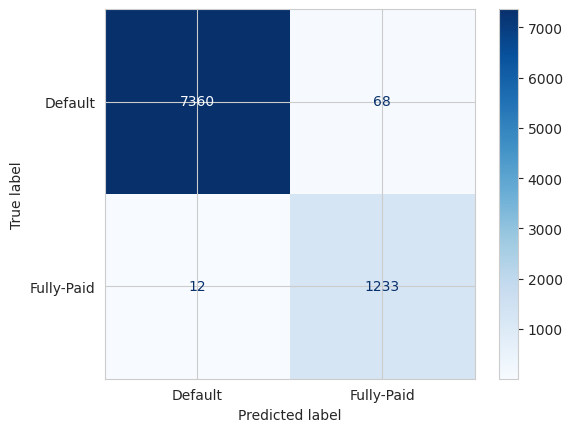

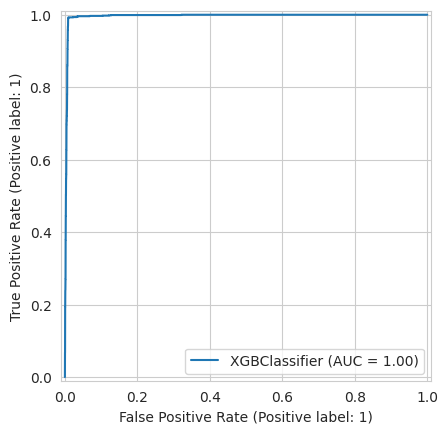

In [ ]:
!pip install scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay # Import ConfusionMatrixDisplay and RocCurveDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
!pip install scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay # Import ConfusionMatrixDisplay and RocCurveDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test,
    cmap='Blues', values_format='d',
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

The AUC score for the XGBClassifier is 1, it shows that the model is accurately perfect model.

In [ ]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

Random Forest Classifier:

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    29569.0  5120.0       1.0    34689.0       34689.0
_______________________________________________
Confusion Matrix: 
 [[29569     0]
 [    0  5120]]

Test Result:
Accuracy Score: 99.15%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999050     0.948659  0.991468     0.973854      0.991816
recall        0.990980     0.994378  0.991468     0.992679      0.991468
f1-score      0.994999     0.970980  0.991468     0.982990      0.991551
support    7428.000000  1245.000000  0.991468  8673.000000   8673.000000
_________

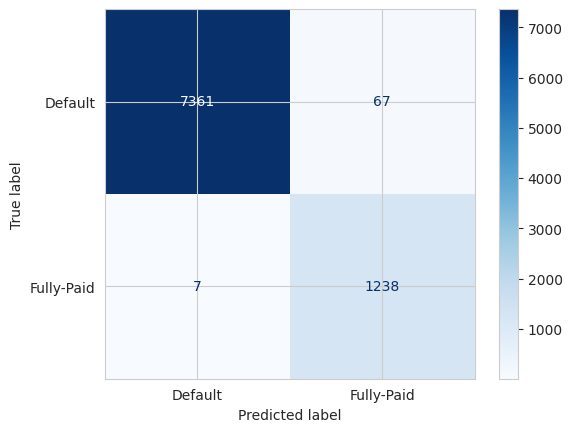

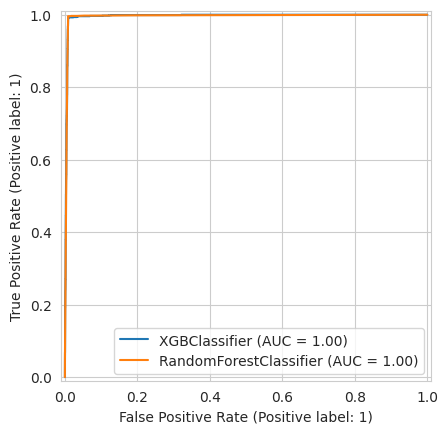

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test,
                             cmap='Blues', values_format='d',
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

The False Positive rate and the true positive rate value is 1 as well as the AUC score for the Random Forest Classifier is 1 showing it to be the perfect model.

In [ ]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

Comparing Model Performances:

In [ ]:
!pip install hvplot holoviews
import pandas as pd
import hvplot.pandas

scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400,
    title="ROC Scores of ML Models", xlabel="ROC Scores",
    alpha=0.4, legend='top'
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 4.6 MB/s eta 0:00:00


:Bars   [index,Variable]   (value)

We can also use KNN to predict the defaulters

KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9831358643950532


VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd # Make sure pandas is imported

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()

# Convert X_train to a DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
  X_train = pd.DataFrame(X_train) # Convert X_train to DataFrame

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

,Features,VIF
4,4,1.35
2,2,NaN
8,8,NaN
10,10,NaN
19,19,NaN


In [ ]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

[13, 6, 14, 5, 7, 1, 15, 18]


In [ ]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,0,2,3,4,8,9,10,11,12,16,17,19
0,0.897651,0.0,0.9,0.5,0.0,0.0,0.0,0.421053,0.669214,0.433333,0.643767,0.0
1,0.621550,0.0,0.4,1.0,0.0,0.0,0.0,0.210526,0.251379,0.100000,0.741104,0.0
2,0.957045,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.873929,0.666667,0.770184,0.0
3,0.193992,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.488310,0.333333,0.203443,0.0
4,0.149694,0.0,0.3,0.0,0.0,0.0,0.0,0.157895,0.000000,0.500000,0.223775,0.0


In [ ]:
X_test = pd.DataFrame(X_test)

# Now you can use the drop method
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,0,2,3,4,8,9,10,11,12,16,17,19
0,0.542907,0.0,0.3,1.0,0.0,0.458158,0.0,0.052632,0.766269,0.200000,0.159835,0.0
1,0.023116,0.0,0.5,1.0,0.0,0.000000,0.0,0.157895,0.257499,0.300000,0.153980,0.0
2,0.724489,0.0,0.0,0.0,0.0,0.000000,0.0,0.105263,0.000000,0.566667,0.127134,0.0
3,0.188020,0.0,0.0,0.0,0.0,0.000000,0.0,0.263158,0.551794,0.133333,0.404033,0.0
4,0.098625,0.0,0.4,0.5,0.0,0.642831,0.0,0.210526,0.256745,0.466667,0.279918,0.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,16,3.21
0,0,3.14
8,12,3.11
10,17,2.64
7,11,2.16
2,3,1.77
3,4,1.32
5,9,1.19
1,2,NaN
4,8,NaN


In [ ]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

[]


In [ ]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,0,2,3,4,8,9,10,11,12,16,17,19
0,0.897651,0.0,0.9,0.5,0.0,0.0,0.0,0.421053,0.669214,0.433333,0.643767,0.0
1,0.621550,0.0,0.4,1.0,0.0,0.0,0.0,0.210526,0.251379,0.100000,0.741104,0.0
2,0.957045,0.0,0.0,0.0,0.0,0.0,0.0,0.210526,0.873929,0.666667,0.770184,0.0
3,0.193992,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.488310,0.333333,0.203443,0.0
4,0.149694,0.0,0.3,0.0,0.0,0.0,0.0,0.157895,0.000000,0.500000,0.223775,0.0


In [ ]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,0,2,3,4,8,9,10,11,12,16,17,19
0,0.542907,0.0,0.3,1.0,0.0,0.458158,0.0,0.052632,0.766269,0.200000,0.159835,0.0
1,0.023116,0.0,0.5,1.0,0.0,0.000000,0.0,0.157895,0.257499,0.300000,0.153980,0.0
2,0.724489,0.0,0.0,0.0,0.0,0.000000,0.0,0.105263,0.000000,0.566667,0.127134,0.0
3,0.188020,0.0,0.0,0.0,0.0,0.000000,0.0,0.263158,0.551794,0.133333,0.404033,0.0
4,0.098625,0.0,0.4,0.5,0.0,0.642831,0.0,0.210526,0.256745,0.466667,0.279918,0.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,16,3.21
0,0,3.14
8,12,3.11
10,17,2.64
7,11,2.16
2,3,1.77
3,4,1.32
5,9,1.19
1,2,NaN
4,8,NaN


In [ ]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9830782092305919


In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[29419   150]
 [  437  4683]]


In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.9146484375

In [ ]:
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9949271196185194

In [ ]:
print(FP/ float(TN+FP))

0.005072880381480605


In [ ]:
print (TP / float(TP+FP))

0.9689633767846059


In [ ]:
print(TN / float(TN+ FN))

0.9853630760986066


ROC curve:

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

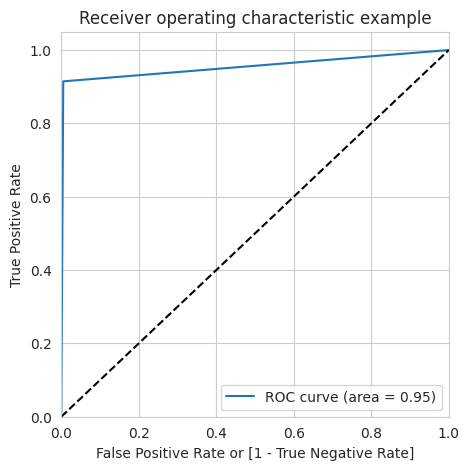

In [ ]:
draw_roc(y_train,predict_train)

The ROC sore for the KNN plot is 0.95 which is nearly perfect model to determine the defaulters in the dataset.

Precision and Recall:

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

0.9689633767846059

In [ ]:
recall_score(y_train,predict_train)

0.9146484375

Test set predictions:

In [ ]:
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [1 0 0 ... 0 0 0]


In [ ]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[7380   48]
 [ 137 1108]]


In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [ ]:
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.978669433875245

In [ ]:
testsensitivity=TP / float(TP+FN)
testsensitivity

0.8899598393574297

Final Observation:

In [ ]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

testspecificity = TN / (TN + FP) # Calculate and assign value to testspecificity

print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :98.31 %
Train Data Sensitivity :91.46 %
Train Data Specificity :99.49 %
Test Data Accuracy     :97.87 %
Test Data Sensitivity  :89.0 %
Test Data Specificity  :99.35 %
